In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<a id="toc"></a>

<h2 align="left"><font color=#fc7651>That's a scam! do not fall for it</font></h2>

<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:130%; text-align:left">

 Ofcourse this is not an SMS, but just another type of spam<br>
    
- SMS Phishing is the most prominent form of phishing.<br>
- The attacker sends a deceptive email that appears to be from a legitimate source.<br>
- The SMS often demand sensitive information, such as login credentials, social security numbers, or financial details. <br>
    
  
    
<br><br>Goal:<br>
    
The goal of this project is to develop a robust SMS spam detection system using two Naive Bayes machine learning techniques. By analyzing the content and characteristics of SMS, the system should be able to accurately classify incoming emails as either spam or legitimate (ham).Futhermore comparison will be made between the two models performances<br>


<br><br>We will be exploring below models:<br>

- Multinomial Naive Bayes algorithm<br>
- Bernoulli Naive Bayes algorithm<br>
    
<br>Data Dictionary:<br>
The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.
This corpus has been collected from free or free for research sources at the Internet:
-> A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: [Web Link]. -> A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: [Web Link]. -> A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at [Web Link]. -> Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available<br>


<center><img src='https://miro.medium.com/max/1400/1*nBgCTU_hAVG00eYkcRf6Mw.png'
     height=300px width=700px /></center>


## <b><span style='color:#28838a'> | </span><span style='color:#fc7651'> Importing the Libraries & Loading data </span></b>

In [21]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
import nltk #Natural Language Toolkit
#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [22]:
#Load data & print samples
df = pd.read_csv('/content/Sms spam collection dataset.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [23]:
#Let's drop the non-relevant unnamed columns
df=df.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'],axis=1)

# Renaming v1 & v2 as Category & Text
df=df.rename(columns={"v1":"Category","v2":"Text"})

#Sample post modifications
df.head()

,Category,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## <b><span style='color:#28838a'> | </span><span style='color:#fc7651'> Exploratory Data Analysis</span></b>

In [24]:
#Let's check the length of the dataset
print(" Total number of rows in the dataset are", len(df))

 Total number of rows in the dataset are 5572


Label distribution (%): ham     86.6
spam    13.4
Name: Category, dtype: float64


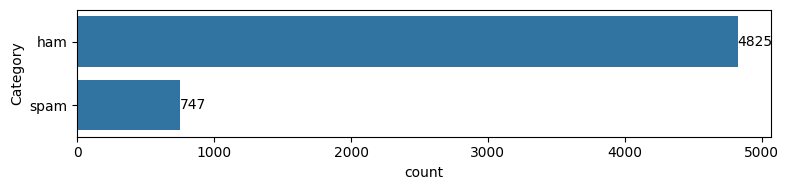

In [25]:
#Let's check the distribution of the Ham & Spam

print('Label distribution (%):', round(df.Category.value_counts(normalize=True),3)*100)
plt.figure(figsize=(8,2))
ax=sns.countplot(data=df, y='Category')
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()


In [26]:
#Descriptive Summary of the dataset
df.describe()

,Category,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:140%; text-align:left">
    
- The dataset has **4825 SMS (86.6%)** labled as Ham while **747 (13.4%)** labaled as Spam.
- "ham" is the predominant category.
- The dataset contains 5,169 unique texts.
- The most frequent text being "Sorry, I'll call later," occurring 30 times.

In [27]:
#Let's create a column to check of each text & plot a histogram to check the distirbution
df['Length']=df['Text'].apply(len)
display(df.head())

#distribution of the data
import plotly.express as px
fig = px.histogram(df, x='Length', marginal='rug',
                   title='Histogram of Text Length')
fig.update_layout(
    xaxis_title='Length',
    yaxis_title='Frequency',
    showlegend=True)

,Category,Text,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
#Lets check the distribution against categories
import plotly.express as px
fig = px.histogram(df, x='Length', color='Category', marginal='rug',
                   title='Histogram of Text Length by Category')
fig.update_layout(
    xaxis_title='Length',
    yaxis_title='Frequency',
    showlegend=True)

In [29]:
#Let's Label the data as 0 & 1 i.e. Spam as 1 & Ham as 0
df.loc[:,'Category']=df.Category.map({'ham':0, 'spam':1})
df['Category'] = df['Category'].astype(int)
df.head()

,Category,Text,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
! pip install wordcloud

## <b><span style='color:#28838a'> </span><span style='color:#fc7651'> Word Cloud : Spam vs Ham </span></b>

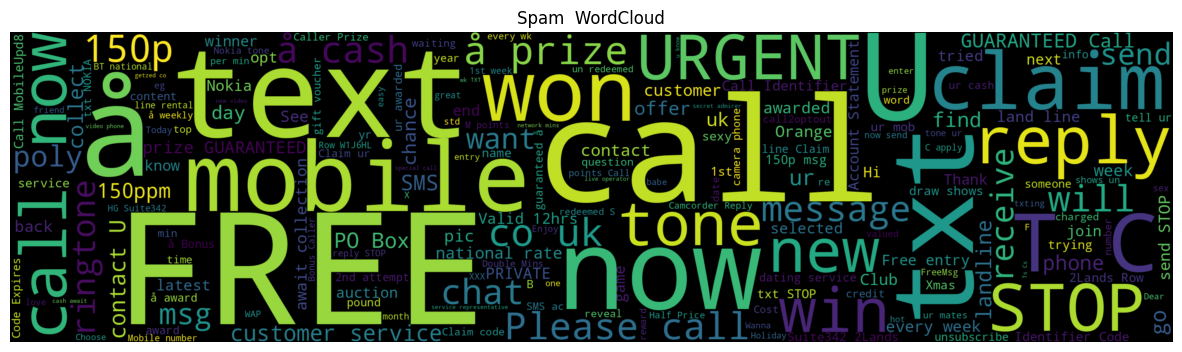

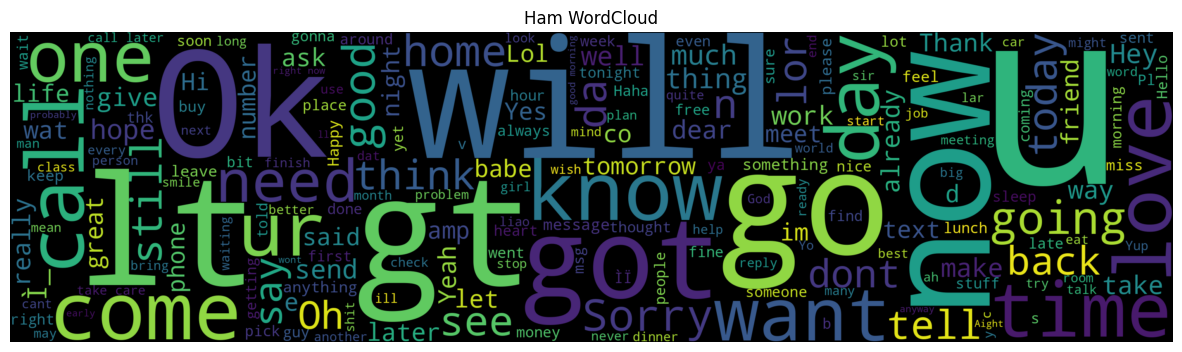

In [31]:
from wordcloud import WordCloud, STOPWORDS
spam = df[df['Category'] == 1]
Ham = df[df['Category'] == 0]

# function to generate and display a WordCloud
def generate_wordcloud(data, title):
    words = ' '.join(data['Text'])
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black',
                          width=3000, height=800).generate(words)
    plt.figure(figsize=(15, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()
# Generate and display WordClouds for each category
generate_wordcloud(spam, 'Spam  WordCloud')
generate_wordcloud(Ham, 'Ham WordCloud')

## <b><span style='color:#28838a'> | </span><span style='color:#fc7651'> Bag of Words </span></b>

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

count = CountVectorizer()
text = count.fit_transform(df['Text'])
#Train & test split
x_train, x_test, y_train, y_test = train_test_split(text, df['Category'], test_size=0.30, random_state=100)
text

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [33]:
#Let's print the dimentions of the train & test dataset
display('X-Train :', x_train.shape)
display('X-Test :',x_test.shape)
display('Y-Train :',y_train.shape)
display('X-Test :',y_test.shape)

'X-Train :'

(3900, 8672)

'X-Test :'

(1672, 8672)

'Y-Train :'

(3900,)

'X-Test :'

(1672,)

## <b><span style='color:#28838a'> | </span><span style='color:#fc7651'> Training the ML models </span></b>

### <b><span style='color:#fc7651'> | </span><span style='color:#28838a'> Multinomial Naive Bayes </span></b>

In [34]:
%%time
# Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

multinomial_nb_model = MultinomialNB()
multinomial_nb_model.fit(x_train, y_train)  # Train the model

prediction = multinomial_nb_model.predict(x_test)

print("Multinomial NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

Multinomial NB
Accuracy score: 0.9814593301435407
Precision score: 0.9174311926605505
Recall score: 0.9389671361502347
F1 score: 0.9280742459396751
CPU times: user 22.5 ms, sys: 0 ns, total: 22.5 ms
Wall time: 40.6 ms


### <b><span style='color:#fc7651'> | </span><span style='color:#28838a'> Bernoulli Naive Bayes </span></b>

In [35]:
%%time
# Bernoulli Naive Bayes model
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

bernoulli_nb_model = BernoulliNB()
bernoulli_nb_model.fit(x_train, y_train)

prediction = bernoulli_nb_model.predict(x_test)

#Evaluation
print("Bernoulli NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

Bernoulli NB
Accuracy score: 0.9838516746411483
Precision score: 1.0
Recall score: 0.8732394366197183
F1 score: 0.9323308270676691
CPU times: user 23.6 ms, sys: 0 ns, total: 23.6 ms
Wall time: 27.7 ms


### <b><span style='color:#fc7651'> | </span><span style='color:#28838a'> Confusion Matrix </span></b>

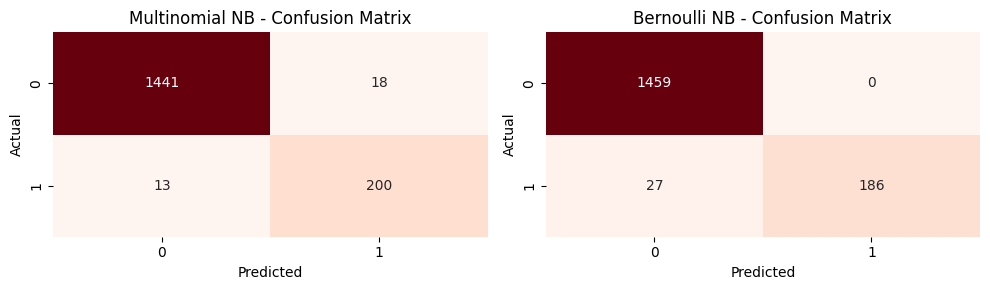

In [39]:
#Confusion Matrix Subplot for 2 Models
from sklearn.metrics import confusion_matrix
models = [("Multinomial NB", multinomial_nb_model), ("Bernoulli NB", bernoulli_nb_model) ]

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for i, (model_name, model) in enumerate(models):
    prediction = model.predict(x_test)
    cm = confusion_matrix(y_test, prediction)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False, ax=axes[i])
    axes[i].set_title(f"{model_name} - Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
plt.tight_layout()
plt.show()


### <b><span style='color:#fc7651'> | </span><span style='color:#28838a'> Metric Comparison Heatmap </span></b>

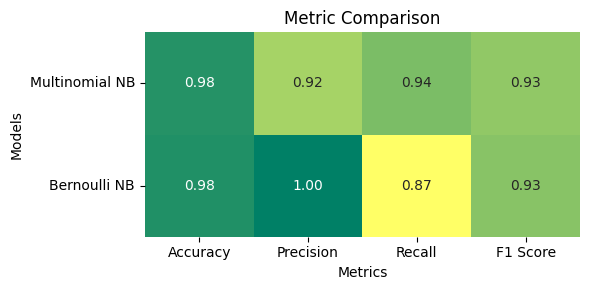

In [37]:
#Metric Comparison Heatmap
metric_data = []
for model_name, model in models:
    prediction = model.predict(x_test)
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    metric_data.append([accuracy, precision, recall, f1])
metric_labels = ["Accuracy", "Precision", "Recall", "F1 Score"]
#heatmap for metric comparison
plt.figure(figsize=(6, 3))
sns.heatmap(metric_data, annot=True, fmt=".2f", cbar=False, cmap="summer_r", xticklabels=metric_labels, yticklabels=[model_name for model_name, _ in models])
plt.title("Metric Comparison")
plt.yticks(rotation=0)
plt.xlabel("Metrics")
plt.ylabel("Models")
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 12px; background-color: #ffffff; font-size:140%; text-align:left">

<h3 align="left"><font color=#fa592d>Conclusion</font></h3>

* both models perform exceptionally well, with high accuracy scores.
*  Bernoulli NB has an accuracy of (98.39%), and Multinomial NB (98.15%)
* Bernoulli NB achieves perfect precision (100%), indicating it has predicated correctly all the time.


> **The final choice of model always depend upon what is needed to be filtered & hence model can be adjusted to improve recall or precision.**
> - If you want to  minimize the number of false negatives i.e spam
SMS messages don't end up in the user's inbox you would like to have high Recall.
> - On the other hand with high precision(false negatives), one might miss important messages because the model is overly cautious in classifying messages as spam.

<p style="font-size:20px; font-family:verdana; line-height: 1.7em; color:#fa592d;">
    <em>Never Click on unknown Links. Stay Safe.</em>
</p>

<center><img src='https://i.pinimg.com/originals/92/9e/c1/929ec1bf7d8fdac26d9fc33529bdbcb5.gif'
     height=300px width=500px /></center>


Acknowledgememnt:

[Email Spam Classifier Using Naive bayes](https://www.kaggle.com/code/shantanudhakadd/email-spam-classifier-using-naive-bayes)

_Image sources- Internet_

<a id="toc"></a>

<a href="#toc" style="background-color: #fa592d; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a>

---
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; color:#fa592d;">
    <em>Appreciate your time exploring my work. If you enjoyed it, kindly consider upvoting or feel free to drop comment / feedback to help enhance the notebook.
<br>Happy Learning!</em>
</p>


<center><img src='https://i.pinimg.com/originals/28/8e/18/288e184d5a45c2e8fb304d07ee3dee1b.gif'
     height=100px width=300px /></center>